# Image classification on a single class using convolutional neural networks

### Future ideas for the final submission:
* Compare performance difference classifying single image in the preprocessing stage (change all other classes than our target class to the same value) vs "after the fact" (make the CNN learn the different classes, and then use that to measure its ability to correctly classify only our target class) ? 

In [1]:
#Group project 3: CNN on CIFAR-10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import numpy as np
#import pickle

In [2]:
def to_binary(arr, e):
    # Creates an array of binary integers 0/1 from an array arr,
    # based on whether the element in arr is equal to e (1 for yes, 0 for no).
    
    # Create a boolean array indicating whether each 0d array contains e or not
    bool_arr = np.isin(arr, [e])
    
    # Convert the boolean array to binary (0 or 1)
    return bool_arr.astype(int)
    

In [3]:
# Easy lookup for output labels

int_labels = {0: 'airplane',
                  1: 'automobile',
                  2: 'bird',
                  3: 'cat',
                  4: 'deer',
                  5: 'dog',
                  6: 'frog',
                  7: 'horse',
                  8: 'ship',
                  9: 'truck'}

label_ints = {v: k for k, v in int_labels.items()} # reverse lookup of corresponding label ints

In [4]:
# load train and test dataset
def load_dataset():
    # load dataset
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    # binary encode outputs so that only
    # the target returns 1 and all else returns 0
    target = 'bird'
    y_train = to_binary(y_train, label_ints[target])
    y_test = to_binary(y_test, label_ints[target])
    
    # one-hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = load_dataset()

In [5]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [6]:
# define cnn model
def define_model():
    model = Sequential()
    # Feature detector
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    # model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # ...
    return model

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [8]:
# run test harness for evaluating the model

# load dataset
X_train, y_train, X_test, y_test = load_dataset()
# prepare pixel data
X_train, X_test = prep_pixels(X_train, X_test)
# define model
model = define_model()
# fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)
model.save('baseline_cnn_1-vgg.h5')

Epoch 1/50
782/782 [==============================] - 30s 38ms/step - loss: 0.2983 - accuracy: 0.8996 - val_loss: 0.2809 - val_accuracy: 0.9001
Epoch 2/50
782/782 [==============================] - 29s 37ms/step - loss: 0.2720 - accuracy: 0.9012 - val_loss: 0.2685 - val_accuracy: 0.9016
Epoch 3/50
782/782 [==============================] - 30s 38ms/step - loss: 0.2620 - accuracy: 0.9029 - val_loss: 0.2796 - val_accuracy: 0.9002
Epoch 4/50
782/782 [==============================] - 29s 37ms/step - loss: 0.2552 - accuracy: 0.9049 - val_loss: 0.2544 - val_accuracy: 0.9052
Epoch 5/50
782/782 [==============================] - 29s 37ms/step - loss: 0.2500 - accuracy: 0.9059 - val_loss: 0.2497 - val_accuracy: 0.9070
Epoch 6/50
782/782 [==============================] - 31s 40ms/step - loss: 0.2442 - accuracy: 0.9075 - val_loss: 0.2462 - val_accuracy: 0.9084
Epoch 7/50
782/782 [==============================] - 30s 38ms/step - loss: 0.2400 - accuracy: 0.9085 - val_loss: 0.2439 - val_accuracy:

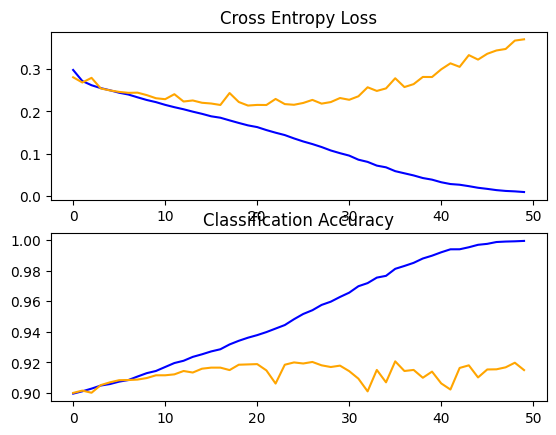

In [9]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
# save plot to file
pyplot.savefig('baseline_cnn_1-vgg_plot.png')
pyplot.show()
pyplot.close()